# Explore vs Exploit

- Bayesian methoda are beneficial
- discuss disadvantages of traditional A/B testing
- extreme example: drug is working well, can you stop test and improve quality of life of all participants?
- frequentist says no
- Bad to stop early. why?
- increase chance of FPs(false positive)
- p-value can pass below/above threshold over time

## Multi-Armed Bandit
- Not all slot machine are equal,1 pays 30% of the time, 1 pays 20% of the time, 1 pays 10% of the time
- Same problem as click-through rate or conversion rate
- click = get a prize
- Traditionality: do A/B test for a specific number N trials, then calculate p-value

## What would you do?
- One arm gives you a prize 3/3 times, other gives you a prize 0/3 times
- you'll intuitively just play the first arm
- why? you ADAPT
- 3 plays probably not enough to attain significance, you still feel compelled to believe the 1st arm is better

## Reinforcement Learning
- faces the same problem
- teach a machine to play a game
- it models rewards it gets based on actions it takes
- process could be stochastic
- reward estimates will be approximate
- early on: few actions taken,unsure about most rewards
- can't choose the action that leads to best reward, because currently knowledge about rewards is minimal
- only after collecting a lot of data will estimate be accurate

## Explore/Exploit
- This is called the explore-exploit dilemma
- If I get 3/3 from bandit 1, 0/3 from bandit2, should I?
- Exploit bandit 1 more? or
- Explore at random to gather more data?
- we'll look at several solutions
- all are adaptive, not all are Bayesian
- we'll show Bayesian last

# Epsilon-Greedy Algorithm
- Epsilon greedy algorithm is one way to solve the explore-exploit dilemma
- Also used in reinforecement learning
- you can still do traditional A/B testing after collecting data
- contingency table for chi-square doesn't require both samples to be same size
- The thing changing here is not the test, but the machine that serves the ads
- It will adapt based on preformance of each ad
- choose a small number epsilon between 0 and 1
- That will be probability of exploration


## Pseudocode
```python
eps = 0.1
while True:
    r = rand()
    if r < eps:
        #explore
        show random advertisement
    else:
        #exploit
        show best advertisement(as determined by click numbers, impressions)
        

```

## Analysis
- one problem: it does the same thing forever
- Even when ad A is statistically significantly better than ad B, it will still sometimes choose B
- Suppose test has converged, A is better than B
- Suppose also reward(clk) is worth 1, reward(no clk) is worth 0
- After N impressions:
- Reward = N(1-eps/2)
- For eps = 0.1, we get 0.95N rather than N
- However,this is still better than traditional A/B test with no adaptation

# UCB1

## A better Algorithm: UCB1
- an intuitive method to solve the explore-exploit tradeoff: epsilon-greedy
- choose small number epsilon = probability of exploration
    - Explore: choose arm at random
    - Exploit: choose current-best arm
- In the long run, get 95% of best possible reward, if eps= 10%
- Can we improve?


## Confidence Interval
- Define upper and lower limit to represent where we believe true CTR is 
- we'll now look at a similar idea
- but use a tighter bound: Chernoff-Hoeffding Bound
- It says, for some:
$$
\epsilon > 0
$$

- Then this is true:
$$
P(\hat{\mu} > \mu + \epsilon) \le exp(-2\epsilon^2N)
$$


- Opposite side is also true:
$$
P(\hat{\mu} < \mu - \epsilon) \le exp(-2\epsilon^2N)
$$

- Different from our old confidence intervals- that gave us an equality
- P($\mu$ in interval) = 95%
- This new equation says: P($\mu$ in interval) > f(N)
$$
P(\hat{\mu} - \mu > \epsilon) \le exp(-2\epsilon^2N) <-> P(\hat{\mu} - \mu \le \epsilon) > 1 - exp(-2\epsilon^2N) \\
P(\hat{\mu} - \mu < \epsilon) \le exp(-2\epsilon^2N) <-> P(\hat{\mu} - \mu \ge -\epsilon) > 1 - exp(-2\epsilon^2N)\\
P(|\hat{\mu}-\mu| \le \epsilon) > 1 - 2exp(-2\epsilon^2N)
$$

## Upper Confidence Bound
- we are only interested in the upper bound
- How does this help us?
- Intuitively, if we have a tigher upper bound, we can be more confident about max, Possible win rate of any bandit
- Skip some math- for each arm j, we choose the epsilon
$$
\epsilon_{j} = \sqrt{\frac{2ln N}{N_{j}}}
$$
- N = total games played so far, $N_{j}$ = total times played arm j

## UCB1 (Upper Confidence Bound) Algorithm

```python
N= 0
Nj = 0 for all bandits j
while True:
   
    j* = argmax(\mu_{j} + \sqrt{\frac{2ln N}{N_{j}}})
    
    Play arm j*

    Update \mu_{j}
    N++,Nj*++
```   

$$
j* = argmax(\mu_{j} + \sqrt{\frac{2ln N}{N_{j}}})
$$

- First term: CTR estimate
    - if high, exploit it more often
- Second term: depends on N and Nj
    - If N is high,but Nj is low, we are not so confident about CTRj, so explore this more
- Consider asymptotic behavior of ln(N)/N
    - As N -> infinity, ln(N)/N approaches 0, so we use only the true CTR in the limit

## UCB1
- no more complicated than epsilon-greedy 
- what is our expected loss
- it can be shown that the loss is proportional to ln(N)
- Compare to epsilon-greedy : loss proportioanl to N
- In the long-run, UCB1 will perform much better than epsilon-greedy
- Code is just as easy to write
- Theory is a more complex

# Conjugate Priors

## Bayesian Paradigm
- Frequentist: we measure things like mean and CTR(Click Through Rate) with point estimates
- e.g sum(X)/N
- Problem was it didn't take into account how accurate those estimates were
- solution: Confidence intervals + Central Limit Theorem
- Maximum likelihood solution

$$
\hat{\theta} = argmax_{\theta}P(X|\theta)
$$

- Bayesian way: treat theta as a random variable too, so it has its own distribution
$$
P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} = \frac{P(X|\theta)P(\theta)}{Z}
$$
- Z = normalizing constant
- $P(X|\theta)$ =  likelihood (how likely is this data given current $\theta$
- P($\theta$) = prior(old beliefs about $\theta$)
- P($\theta|X$) = posterior ( new belief about $\theta$ after seeing data)

- These are all probability distribution
- P(X) is the integral over $P(X|\theta)P(\theta)d\theta$
- generally speaking, hard or impossible to solve
- can use sampling methods like MCMC
     

## Conjugate Priors
- Conjugate Priors give us elegant solutions for $P(\theta|X)$
- how
- if we choose specific distributions for $P(X|\theta)$ and P($\theta$), then we can make $P(\theta|X)$ have the same type of distribution as P($\theta$)

- let's do an example
- we know likelihood for click-through-rate is Bernoulli
$$
P(X|\theta) = \prod_{i=1}^{N}\theta^{x_{i}}(1-\theta)^{1-x_{i}}
$$

- we know $\theta$ must be between 0 and 1, because it's the probability of a click
- what distribution go between 0 and 1?
- Beta distribution
$$
\theta \sim Beta(a,b) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)}\\
B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}\\
\Gamma(n) = (n-1)!
$$

- Gamma is a generalize factorial for real number

- can we solve for the posterior?
$$
P(\theta|X) \propto [\prod_{i=1}^{N}\theta^{x_{i}}(1-\theta)^{1-x_{i}}]\theta^{a-1}(1-\theta)^{b-1}\\
P(\theta|X) \propto \theta^{a-1 + \sum_{i=1}^{N}x_{i}}(1-\theta)^{b-1+\sum_{i=1}^{N}(1-x_{i})}\\
$$
- same shape as Beta, Normalization constant doesn't depend on $\theta$

$$
P(\theta|X) = Beta(a',b')\\
a' = a + \sum_{i=1}^{N}x_{i} ,b' = b+ N- \sum_{i=1}^{N}x_{i}\\
$$
- a' = a + number of clicks, b' = b+ number of no clicks

## Beta mean
- same as we would've gotten by maximizing likelihood

$$
E(\theta) = \frac{a}{a+b}
$$

## Beta Variance 
- the bigger a and b get, the smaller the variance becomes
- same behavior as approximated confidence interval
- variance gets smaller as we collect more data

$$
var(\theta) = \frac{ab}{(a+b)^2(a+b+1)}
$$

## Prior
- how do we choose original a and b?
- Beta(a = 1,b=1) is equal to Uniform (0,1)
- Makes sense between if we don't know anything, all click through rates are equally probable
- called a non-informative prior
- important: as data we collect gets large, influence of prior becomes negiligibly small



## Summary
- we want to know treat parameter as a random variable with a probability distribution
- we identify specific distribution (Bernoulli+ Beta), such that posterior and prior are the same type of distribution using Bayes rule
- we call these conjugate prior
- we showed Beta has same mean as max, likelihood of Bernoulli, and variance shrinks as more N increases, just like frequentist C.I(confidence interval)

# Bayesian A/B testing


- How do we actually use these to solve the explore-exploit diliemma?
- and do it better than epsilon-greedy/UCB1?


## Sampling
- whenever you generate random variables, you should ask what distribution am I sampling from?
- Most programming languages give you rand()- uniformly distributed between 0 and 1
- numpy gives us randn()- Gaussian with mean = 0, var = 1
- Scipy gives us many, Beta is included
- How does sampling from Beta help us?


## Scenario 1
- the mean of one of two pretty good distribution placed in right side than the other pretty good distribution 
- we've spent a lot of time exploring already -> sharp distribution, high confidence
- If we sample from these 2 distribution, we expect with very high probability that the one with higher CTR (click through rate) will give us a higher random number
- wrt bandit problem: choose the bandit that gives us the largest sample


- Possible for worse bandit to give us a higher random number
- But becomes increasingly unlikely as distribution get sharper

## Scenario 2
- pretty good distribution placed in right side than fat distribution 
- One bandit we are very sure of, other we are not(fat variance)
- Bandit with fat variance has a higher probability of giving us the larger number in this scenario
- The distribution themseleves tell us how much to explore and exploit
- More data, less variance, less exploration, and vice versa

- Sharp CTR is already pretty good 
- Fat variance CTR has more probability weight below the pretty good one
- Therefore more probable that fat variance CTR gives us a lower random sample
- Therefore spend more time exploiting pretty good bandit

## Scenario 3
- the mean of pretty good distribution placed in left side than fat distribution 
- Sharp CTR bandit is pretty good
- now more probability weight of the fat variance bandit is to the right of it -> more likely to explore the other bandit now


## Thompson Sampling
- this method is also called Thompson sampling
- also used in context of reinforcement learning
- so we may cross paths with it again

![](http://www.secmem.org/assets/images/discounted-thompson-sampling/beta_distribution+action_probability.PNG)
[TS_Tutorial.pdf](https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf)

## Pseudo Code

```python
while True:
    Draw a random sample from all bandits' current Beta(aj,bj)
    j* = bandit that gives us maximum sample
    x = Play bandit j*
    aj* = aj* + x
    bj* = bj* + 1 -x
```
- independent of number of bandits

# In Code

```python
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta


NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


```


$$
P(\theta|X) = Beta(a',b')\\
a' = a + \sum_{i=1}^{N}x_{i} ,b' = b+ N- \sum_{i=1}^{N}x_{i}\\
$$
- a' = a + number of clicks, b' = b+ number of no clicks

```python
class Bandit(object):
    # p is probability of winning
  def __init__(self, p):
    self.p = p
    # Beta(a,b) = Beta(1,1) = uniform distribution
    self.a = 1
    self.b = 1

  def pull(self):
    # we get 1 if less than p, otherwise 0
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x

```

```python
def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label="real p: %.4f" % b.p)
  plt.title("Bandit distributions after %s trials" % trial)
  plt.legend()
  plt.show()
```

```python
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  for i in range(NUM_TRIALS):

    # take a sample from each bandit
    bestb = None
    maxsample = -1
    allsamples = [] # let's collect these just to print for debugging
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f" % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print("current samples: %s" % allsamples)
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bestb.pull()

    # update the distribution for the bandit whose arm we just pulled
    bestb.update(x)

```

current samples: ['0.3500', '0.3163', '0.6909']


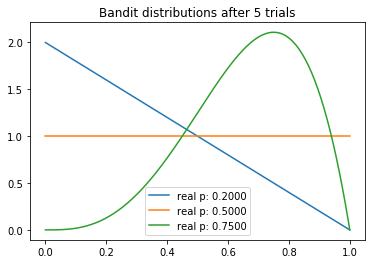

current samples: ['0.5269', '0.8040', '0.5966']


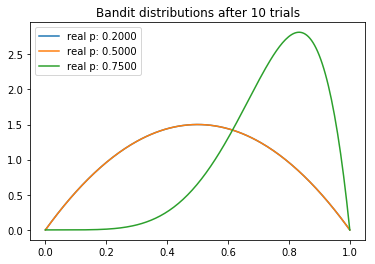

current samples: ['0.9798', '0.9074', '0.7353']


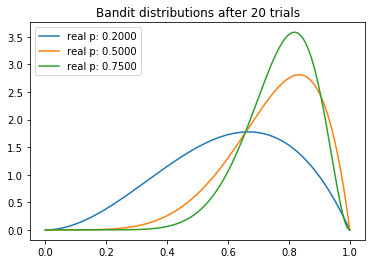

current samples: ['0.6926', '0.6559', '0.8512']


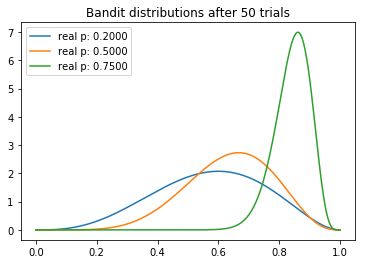

current samples: ['0.2704', '0.7578', '0.8695']


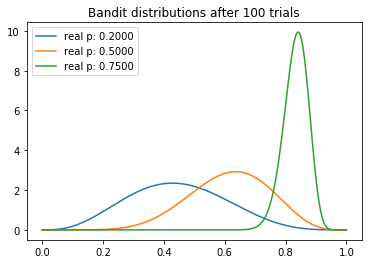

current samples: ['0.5215', '0.6109', '0.8318']


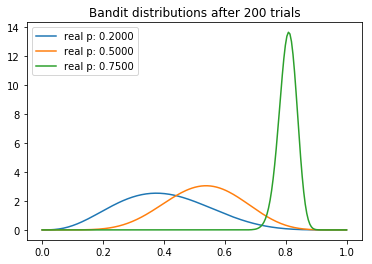

current samples: ['0.4763', '0.5845', '0.7899']


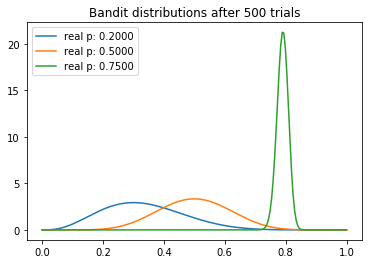

current samples: ['0.2883', '0.5197', '0.7614']


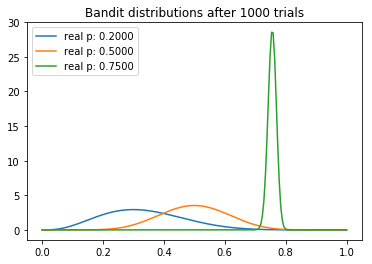

current samples: ['0.2895', '0.5716', '0.7188']


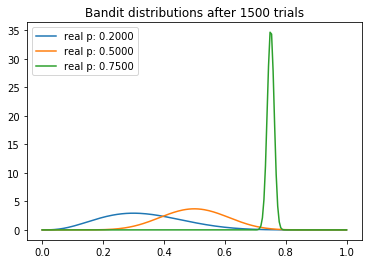

current samples: ['0.3588', '0.4570', '0.7360']


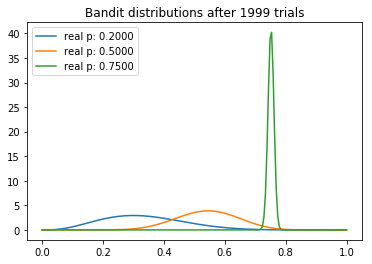

In [3]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta


NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit(object):
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
#     print("x {}".format(x))
    self.a += x
    self.b += 1 - x


def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label="real p: %.4f" % b.p)
  plt.title("Bandit distributions after %s trials" % trial)
  plt.legend()
  plt.show()


def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  for i in range(NUM_TRIALS):

    # take a sample from each bandit
    bestb = None
    maxsample = -1
    allsamples = [] # let's collect these just to print for debugging
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f" % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print("current samples: %s" % allsamples)
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bestb.pull()

    # update the distribution for the bandit whose arm we just pulled
    bestb.update(x)


if __name__ == "__main__":
  experiment()


# Online Nature of Bayesian A/B testing

## Bayesian Sampling
- Started with traditional A/B test with all sorts of approximations, awkwardly decide how many samples are needed with more approximations, run full experiment without any adaptation to results
- If you want to stop early, frequentist statistics says you won't get a valid result
- Now we have ad adpative system that doesn't require any kind of test
- Just run it and eventually it does the best possible thing
- No threshold at which results become valid
- Just naturally converge to equilibrium

## The online nature of Bayesian Methods
- Measurement become more accurate after every sample collected
- we didn't just update a and b after collecting all the data,we updateed it after every time we pulled an arm
- the posterior we have now becomes the prior when we incorporate even more data
- $P(\theta_{t}|X) = P(X_{t}|\theta_{t-1})P(\theta_{t-1})$
- $P(\theta_{t+1}|X) = P(X_{t+1}|\theta_{t})P(\theta_{t})$

- Compare that to traditional machine learning methods
- fit(Xtrain,Ytrain) all at once
- if we get more data, retrain from scratch
- with Beta, just add a number to a , add a number to b
- it automatically fine-tunes

- __This is called online learning__
- model learns after every new sample
- constant RAM
- might remind you of how humans and animals learn
- we take our most recent experience, and form some opinion about it
- never do we take every experience we've ever had and try to reach some global optimum
- we can't do that because our memory systems are imperfect
- many satisfying aspects of the Bayesian method


# Finding a Threshold without p-value

## Threshold
- Even though Bayesian testing is efficient, it still takes up resources
- Must store a and b somewhere
- generate random number
- eventually, we are certain advertisement A is better than advertisement B
- why not just show advertisement A statically?


## $P(\mu_{1} > \mu_{2})$

- $\mu$ = click through rate
- $\mu_{1}$ and $\mu_{2}$ are Beta distributed
- How can we get $P(\mu_{1} > \mu_{2})$?
- First, let's look at P-value definition again

- easy to phrase things incorrectly and make statisticians angry


- you can't accept the null hypothesis, you can only not reject the null hypothesis
- easy to see why machine learning gets more attention than statistics, even though they are so similar
- Easy for non-technical people to misunderstand
- common error: p-value is 1% -> $P(\mu_{1} > \mu_{2})$ is 99%
- yet, this is the probability we intuitively want
- since $\mu_{1}$ and $\mu_{2}$ have probability distributions, we can calculate it 
- but how

- Start from first principles
- $P(\mu_{1} > \mu_{2})$ = $P(\mu_{1}-\mu_{2}>0)$ = P(X>0) = area under PDF of X from 0...infinity
- PDF(X) = Beta1(X)*Beta2(-X)(convolution operator)
- Instead, let's take an alternative route
- Joint PDF= $P(\mu_{1} , \mu_{2})$ = P($\mu_{1}$)P($\mu_{2}$)
- $P(\mu_{1} > \mu_{2})$ = area under P($\mu_{1},\mu_{2}$) where $\mu_{1} > \mu_{2}$

## $P(\mu_{1} > \mu_{2})$  solution

- summation is $O(a_{2})$, not necessarily fast to calculate

$$
P(\mu_{1} > \mu_{2})  = \int_{0}^{1}\int_{\mu_{1}}^{1}\frac{\mu_{1}^{a_{1}-1}(1-\mu_{1})^{b_{1}-1} }{ B(a_{1},b_{1}) }\frac{\mu_{2}^{a_{2}-1}(1-\mu_{2})^{b_{2}-1} }{ B(a_{2},b_{2}) }d\mu_{1}\mu_{2}\\
P(\mu_{1} > \mu_{2})  = \sum_{i=0}^{a_{2}-1}\frac{ B(a_{1}+i,b_{1}+b_{2}) }{(b_{2}+i)B(1+i,b_{2})B(a_{1},b_{1}) }
$$


## Another option
- Instead of stopping when we reach some probability, we can define a loss function, and stop when the expected loass goes below that
- given $\mu_{1}>\mu_{2}$
$$
L = max(\mu_{2}-\mu_{1},0)
$$

- stop
$$
E_{\mu_{1},\mu_{2}}(L) < threshold
$$


## Loss Threshold

$$
E_{ \mu_{1},\mu_{2}}(L)  = \int_{0}^{1}\int_{0}^{1}max(\mu_{2}-\mu_{1},0)\frac{\mu_{1}^{a_{1}-1}(1-\mu_{1})^{b_{1}-1} }{ B(a_{1},b_{1}) }\frac{\mu_{2}^{a_{2}-1}(1-\mu_{2})^{b_{2}-1} }{ B(a_{2},b_{2}) }d\mu_{1}\mu_{2}\\
E_{ \mu_{1},\mu_{2}}(L)  = \int_{0}^{1}\int_{\mu_{1}}^{1}(\mu_{2}-\mu_{1})\frac{\mu_{1}^{a_{1}-1}(1-\mu_{1})^{b_{1}-1} }{ B(a_{1},b_{1}) }\frac{\mu_{2}^{a_{2}-1}(1-\mu_{2})^{b_{2}-1} }{ B(a_{2},b_{2}) }d\mu_{1}\mu_{2}\\
$$

$$
\mu_{1} \sim Beta(a_{1},b_{1})\\
\mu_{2} \sim Beta(a_{2},b_{2})\\
P(\mu_{1} > \mu_{2}) \equiv H(a_{1},b_{1},a_{2},b_{2})\\
E(L) = \frac{ B(a_{1}+1,b_{1}) }{B(a_{1},b_{1})  }H(a_{1}+1,b_{1},a_{2},b_{2}) - \frac{ B(a_{2}+1,b_{2}) }{B(a_{2},b_{2})  }H(a_{1},b_{1},a_{2}+1,b_{2})
$$


## Thresholds
- while it's possible to define and apply a threshold, we'll next look at how the Bayesian method automatically converges to the maximum CTR  

[bayesian-ab-testing](http://www.evanmiller.org/bayesian-ab-testing.html)  
[bayesian_ab_decision_rule](https://www.chrisstucchio.com/blog/2014/bayesian_ab_decision_rule.html)

# reference

[bayesian-ab-testing](https://zlatankr.github.io/posts/2017/04/07/bayesian-ab-testing)  
[Understanding Bayesian A/B testing (using baseball statistics)](http://varianceexplained.org/r/bayesian_ab_baseball/)  
[Bayesian A/B Testing in Python](http://www.marcosantoni.com/2016/05/15/bayesian-ab-testing-in-python.html)  
[Coding Bayesian AB Tests in Python to Boost your App or Website Conversions](https://medium.com/@thibalbo/coding-bayesian-ab-tests-in-python-e89356b3f4bd)  
[A/B Testing: The Definitive Guide to Improving Your Product](https://www.dataquest.io/blog/a-b-testing-the-definitive-guide-to-improving-your-product/)  
[messi-ronaldo](https://www.datascience.com/blog/experimenting-the-bayesian-way)  
[PyMC3 prior bayesian ab](https://juanitorduz.github.io/intro_pymc3/)  
[AB testing](https://github.com/mainkoon81/Study-02-AB-Testing)
